In [4]:
import json 
import os
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
from nltk.util import ngrams
import itertools

from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB, BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

C:\Users\acm\Downloads\Anacondapy\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [6]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-10-18 11:11:50.520874: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-10-18 11:11:50.520952: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-18 11:11:56.101114: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-10-18 11:11:56.101152: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-18 11:11:56.107183: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-8QC9IFM7
2022-10-18 11:11:56.107352: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-8QC9IFM7
C:\Users\acm\Downloads\Anacondapy\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=

In [2]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [25]:
path=r"C:\Users\acm\Desktop\aclImdb\train\pos"

In [26]:
os.listdir(path)

['0_9.txt',
 '10000_8.txt',
 '10001_10.txt',
 '10002_7.txt',
 '10003_8.txt',
 '10004_8.txt',
 '10005_7.txt',
 '10006_7.txt',
 '10007_7.txt',
 '10008_7.txt',
 '10009_9.txt',
 '1000_8.txt',
 '10010_7.txt',
 '10011_9.txt',
 '10012_8.txt',
 '10013_7.txt',
 '10014_8.txt',
 '10015_8.txt',
 '10016_8.txt',
 '10017_9.txt',
 '10018_8.txt',
 '10019_8.txt',
 '1001_8.txt',
 '10020_8.txt',
 '10021_8.txt',
 '10022_7.txt',
 '10023_9.txt',
 '10024_9.txt',
 '10025_9.txt',
 '10026_7.txt',
 '10027_7.txt',
 '10028_10.txt',
 '10029_10.txt',
 '1002_7.txt',
 '10030_10.txt',
 '10031_10.txt',
 '10032_10.txt',
 '10033_10.txt',
 '10034_8.txt',
 '10035_9.txt',
 '10036_8.txt',
 '10037_9.txt',
 '10038_10.txt',
 '10039_10.txt',
 '1003_10.txt',
 '10040_10.txt',
 '10041_10.txt',
 '10042_10.txt',
 '10043_10.txt',
 '10044_9.txt',
 '10045_10.txt',
 '10046_9.txt',
 '10047_10.txt',
 '10048_10.txt',
 '10049_8.txt',
 '1004_7.txt',
 '10050_10.txt',
 '10051_10.txt',
 '10052_10.txt',
 '10053_8.txt',
 '10054_10.txt',
 '10055_7.tx

In [27]:
os.path.join(path, os.listdir(path)[0])

'C:\\Users\\acm\\Desktop\\aclImdb\\train\\pos\\0_9.txt'

In [38]:
path = r"Z:\aclImdb\train\pos"

In [5]:
path = r"Z:\aclImdb\train\pos"

In [8]:
reviews = []
for file in os.listdir(path):
    path1 = os.path.join(path, file)
#if os.path.isfile(path):
    with open(path1, 'r', encoding='utf-8') as fin:
        reviews.append(fin.read())

In [9]:
len(reviews)

12500

In [10]:
reviews[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [11]:
reviews_df = pd.DataFrame(reviews,columns=['imdb_review'])

#Understand basic details about the dataframe
print("Shape of dataframe is = ",reviews_df.shape)
print()
print(reviews_df.head(3))
print()

Shape of dataframe is =  (12500, 1)

                                         imdb_review
0  Bromwell High is a cartoon comedy. It ran at t...
1  Homelessness (or Houselessness as George Carli...
2  Brilliant over-acting by Lesley Ann Warren. Be...



In [12]:
#There are no blank rows in the dataframe
print(reviews_df[reviews_df['imdb_review'] == ''].shape)
print(reviews_df[reviews_df['imdb_review'] != ''].shape)

(0, 1)
(12500, 1)


## Preparing for topic modelling

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\acm\AppData\Roaming\nltk_data...


True

In [15]:
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

In [16]:
def preprocess(document):
    'changes document to lower case and removes stopwords'

    # Make the text lowercase
    document = document.lower()
    
    #Remove text in square brackets
    document=re.sub("\{\w*\}", "", document)
    document=re.sub("\[\w*\]", "", document)
    document=re.sub("\(\w*\)", "", document)
    
    #Remove punctuation and words containing numbers
    document = re.sub("[^\sA-z]","",document)
    
    # tokenize into words
    words = word_tokenize(document)
    
    # remove stop words
    #words = [word for word in words if word not in stopwords.words("english")]
    
    # Lemmatizing the words
    words = [wordnet_lemmatizer.lemmatize(word) for word in words]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document

In [17]:
#Preprocess each complaint in the dataframe and store it in new column named 'preprocessed_complaint'
preprocessed_review = [preprocess(review) for review in tqdm(reviews_df['imdb_review'])]
reviews_df['preprocessed_review'] = pd.Series(preprocessed_review)

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:27<00:00, 455.53it/s]


In [18]:
reviews_df.head(5)

,imdb_review,preprocessed_review
0,Bromwell High is a cartoon comedy. It ran at t...,bromwell high is a cartoon comedy it ran at th...
1,Homelessness (or Houselessness as George Carli...,homelessness or houselessness a george carlin ...
2,Brilliant over-acting by Lesley Ann Warren. Be...,brilliant overacting by lesley ann warren best...
3,This is easily the most underrated film inn th...,this is easily the most underrated film inn th...
4,This is not the typical Mel Brooks film. It wa...,this is not the typical mel brook film it wa m...


In [19]:
def pos_tag(text):
  # write your code here
    model = spacy.load("en_core_web_sm")
    complaint_POS_removed = []
    
    for i in tqdm(range(0,len(text))):
        sent = model(text[i])
        sent_holder=[]
        
        for token in sent:
            if(token.pos_ in ["NOUN"]):
                sent_holder.append(token)
        
        #print(sent_holder)
        res = " ".join([str(ele) for ele in sent_holder])
        #print(res)
        complaint_POS_removed.append(res)
        
    return pd.Series(complaint_POS_removed)

In [20]:
#this column should contain lemmatized text with all the words removed which have tags other than NN[tag == "NN"].
reviews_df['preprocessed_review_POS_removed'] =  pos_tag(reviews_df['preprocessed_review'])
#df_clean["complaint_POS_removed"] =  pos_tag(df['preprocessed_complaint'])

100%|████████████████████████████████████████████████████████████████████████████| 12500/12500 [06:25<00:00, 32.46it/s]


In [21]:
reviews_df.head(3)

,imdb_review,preprocessed_review,preprocessed_review_POS_removed
0,Bromwell High is a cartoon comedy. It ran at t...,bromwell high is a cartoon comedy it ran at th...,cartoon comedy time program school life teache...
1,Homelessness (or Houselessness as George Carli...,homelessness or houselessness a george carlin ...,houselessness issue year plan street school wo...
2,Brilliant over-acting by Lesley Ann Warren. Be...,brilliant overacting by lesley ann warren best...,overacting hobo lady scene clothes warehouse n...


## Word Cloud

In [22]:
#Visualise the data according to the 'Complaint' character length

reviewLength = [len(review.split()) for review in tqdm(reviews_df['imdb_review'])]
reviewLength = pd.Series(reviewLength)

#View length of first 5 complaints from the dataframe
reviewLength[:5]

100%|█████████████████████████████████████████████████████████████████████████| 12500/12500 [00:00<00:00, 44503.94it/s]


0    140
1    428
2    147
3    124
4    120
dtype: int64

In [23]:
reviewLength.sort_values(ascending=False, inplace=True)
reviewLength[:5]

1954    2470
49      1839
6258    1830
5917    1723
4346    1601
dtype: int64

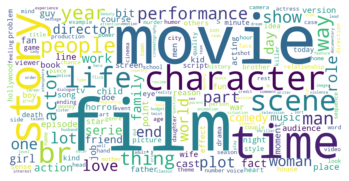

In [24]:
word_cloud = WordCloud(collocations = False, background_color = 'white',width = 1600, height = 800).generate(' '.join(reviews_df['preprocessed_review_POS_removed']))
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")
plt.show()

In [25]:
#Write your code here to find the top 10 unigram frequency among the complaints in the dataframe. 
unigrams = ngrams(' '.join(reviews_df['preprocessed_review_POS_removed']).split(), 1)
nltk.FreqDist(unigrams).most_common(10)

[(('film',), 23616),
 (('movie',), 21750),
 (('time',), 7742),
 (('story',), 7178),
 (('character',), 6785),
 (('br',), 4805),
 (('scene',), 4804),
 (('life',), 4610),
 (('people',), 4460),
 (('way',), 4223)]

In [26]:
#Write your code here to find the top 10 bigram frequency among the complaints in the dataframe. 
bigrams = ngrams(' '.join(reviews_df['preprocessed_review_POS_removed']).split(), 2)
nltk.FreqDist(bigrams).most_common(10)

[(('movie', 'movie'), 1262),
 (('film', 'film'), 1043),
 (('movie', 'time'), 574),
 (('film', 'movie'), 445),
 (('br', 'movie'), 445),
 (('film', 'time'), 427),
 (('br', 'film'), 419),
 (('movie', 'film'), 416),
 (('time', 'movie'), 416),
 (('time', 'film'), 327)]

In [27]:
trigrams = ngrams(' '.join(reviews_df['preprocessed_review_POS_removed']).split(), 3)
nltk.FreqDist(trigrams).most_common(10)

[(('movie', 'movie', 'movie'), 105),
 (('film', 'film', 'film'), 66),
 (('movie', 'time', 'movie'), 63),
 (('movie', 'movie', 'time'), 54),
 (('movie', 'people', 'movie'), 39),
 (('movie', 'time', 'time'), 34),
 (('movie', 'horror', 'movie'), 30),
 (('film', 'time', 'film'), 29),
 (('dog', 'bite', 'dog'), 29),
 (('people', 'movie', 'movie'), 27)]

In [28]:
vect = TfidfVectorizer(stop_words='english')
X = vect.fit_transform(reviews_df['imdb_review'])

pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

,00,000,000s,003830,006,007,0079,0080,0083,0093638,...,élan,émigré,émigrés,était,état,étc,êxtase,ís,østbye,über
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## NMF Decomposition

In [29]:
import warnings
warnings.filterwarnings("ignore")

N_TOPICS = 10
nmf = NMF(n_components=N_TOPICS)
W = nmf.fit_transform(X)  # Document-topic matrix
H = nmf.components_       # Topic-term matrix

print("W(Document-topic matrix) shape = ", W.shape)
print("H(Topic-term matrix) shape = ", H.shape)

W(Document-topic matrix) shape =  (12500, 10)
H(Topic-term matrix) shape =  (10, 55428)


In [30]:
words = np.array(vect.get_feature_names())
topic_words = pd.DataFrame(np.zeros((N_TOPICS, 10)), index=[f'Topic {i + 1}' for i in range(N_TOPICS)],
                           columns=[f'Word {i + 1}' for i in range(10)]).astype(str)
for i in range(N_TOPICS):
    ix = H[i].argsort()[::-1][:10]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 1,br,10,ll,end,spoilers,just,scene,plot,like,quite
Topic 2,movie,movies,great,watch,10,saw,recommend,seen,best,acting
Topic 3,film,films,seen,characters,director,great,acting,cinema,scenes,saw
Topic 4,series,episode,episodes,season,tv,characters,dvd,television,trek,original
Topic 5,life,story,love,family,young,father,real,man,characters,way
Topic 6,good,story,action,really,pretty,bad,acting,plot,scenes,job
Topic 7,war,world,people,documentary,american,history,men,time,soldiers,human
Topic 8,best,great,role,performance,cast,character,comedy,actor,john,man
Topic 9,horror,house,creepy,films,gore,scary,killer,budget,halloween,fans
Topic 10,like,just,don,think,really,funny,watch,know,people,ve


In [31]:
#Create the best topic for each complaint in terms of integer value 0,1,2,3 & 4

W = pd.DataFrame(W, columns=[f'Topic {i + 1}' for i in range(N_TOPICS)])
W['topic'] = W.apply(lambda x: x.idxmax(), axis=1)
W.head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,topic
0,0.000563,0.000000,0.000698,0.012307,0.007895,0.000000,0.007247,0.004951,0.001907,0.010395,Topic 4
1,0.026028,0.000000,0.004006,0.000000,0.017899,0.000000,0.025169,0.006662,0.000664,0.022799,Topic 1
2,0.000309,0.013217,0.001469,0.001043,0.003580,0.011123,0.001913,0.030751,0.004213,0.005888,Topic 8
3,0.000000,0.002189,0.027463,0.000000,0.016417,0.003941,0.004042,0.011553,0.000324,0.002328,Topic 3
4,0.000000,0.038433,0.016167,0.000000,0.000000,0.041160,0.000000,0.022283,0.001890,0.000000,Topic 6
5,0.061265,0.010370,0.000000,0.003947,0.010553,0.009771,0.000000,0.010941,0.014544,0.013208,Topic 1
6,0.057564,0.012817,0.030043,0.000000,0.007513,0.042150,0.000000,0.001362,0.003985,0.003751,Topic 1
7,0.041340,0.000000,0.014809,0.001330,0.016440,0.007127,0.000718,0.020052,0.008940,0.005024,Topic 1
8,0.039552,0.000000,0.008750,0.002783,0.019590,0.008463,0.000000,0.024547,0.014098,0.000000,Topic 1
9,0.031227,0.020483,0.017390,0.000031,0.009917,0.013976,0.005976,0.037393,0.014925,0.007665,Topic 8


In [32]:
reviews_df['Topic'] = W['topic']
reviews_df.head(3)

,imdb_review,preprocessed_review,preprocessed_review_POS_removed,Topic
0,Bromwell High is a cartoon comedy. It ran at t...,bromwell high is a cartoon comedy it ran at th...,cartoon comedy time program school life teache...,Topic 4
1,Homelessness (or Houselessness as George Carli...,homelessness or houselessness a george carlin ...,houselessness issue year plan street school wo...,Topic 1
2,Brilliant over-acting by Lesley Ann Warren. Be...,brilliant overacting by lesley ann warren best...,overacting hobo lady scene clothes warehouse n...,Topic 8


In [33]:
topic_mapping = {
    'Topic 1': 'Other',
    'Topic 2': 'Other',
    'Topic 3': 'Other',
    'Topic 4': 'TV',
    'Topic 5': 'Family',
    'Topic 6': 'Other',
    'Topic 7': 'War',
    'Topic 8': 'Comedy',
    'Topic 9': 'Horror',
    'Topic 10': 'Other',
}
#Replace Topics with Topic Names
reviews_df['Topic'] = reviews_df['Topic'].map(topic_mapping)

In [34]:
reviews_df.head(3)

,imdb_review,preprocessed_review,preprocessed_review_POS_removed,Topic
0,Bromwell High is a cartoon comedy. It ran at t...,bromwell high is a cartoon comedy it ran at th...,cartoon comedy time program school life teache...,TV
1,Homelessness (or Houselessness as George Carli...,homelessness or houselessness a george carlin ...,houselessness issue year plan street school wo...,Other
2,Brilliant over-acting by Lesley Ann Warren. Be...,brilliant overacting by lesley ann warren best...,overacting hobo lady scene clothes warehouse n...,Comedy


## Supervised model to predict any new complaints to the relevant Topics.

In [38]:
topic_mapping = {
    'Other':'1',
    'Other':'2',
    'Other':'3',
    'TV':'4',
    'Family':'5',
    'Other':'6',
    'War':'7',
    'Comedy':'8',
    'Horror':'9',
    'Other':'10'
}
#Replace Topics with Topic Names
reviews_df['Topic'] = reviews_df['Topic'].map(topic_mapping)

In [39]:
reviews_df.head(3)

,imdb_review,preprocessed_review,preprocessed_review_POS_removed,Topic
0,Bromwell High is a cartoon comedy. It ran at t...,bromwell high is a cartoon comedy it ran at th...,cartoon comedy time program school life teache...,4
1,Homelessness (or Houselessness as George Carli...,homelessness or houselessness a george carlin ...,houselessness issue year plan street school wo...,10
2,Brilliant over-acting by Lesley Ann Warren. Be...,brilliant overacting by lesley ann warren best...,overacting hobo lady scene clothes warehouse n...,8


In [40]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   imdb_review                      12500 non-null  object
 1   preprocessed_review              12500 non-null  object
 2   preprocessed_review_POS_removed  12500 non-null  object
 3   Topic                            12500 non-null  object
dtypes: object(4)
memory usage: 390.8+ KB


In [41]:
reviews_df['Topic'] = reviews_df['Topic'].astype('int32')
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   imdb_review                      12500 non-null  object
 1   preprocessed_review              12500 non-null  object
 2   preprocessed_review_POS_removed  12500 non-null  object
 3   Topic                            12500 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 341.9+ KB


In [43]:
training_data = reviews_df[['imdb_review','Topic']]

In [44]:
training_data.shape

(12500, 2)

In [45]:
training_data.head(3)

,imdb_review,Topic
0,Bromwell High is a cartoon comedy. It ran at t...,4
1,Homelessness (or Houselessness as George Carli...,10
2,Brilliant over-acting by Lesley Ann Warren. Be...,8


In [46]:
training_data = training_data.sample(frac = 1)
training_data.head(3)

,imdb_review,Topic
12000,"I must say, I was surprised with the quality o...",10
8304,"Fred Astaire and Ginger Rogers, Hollywood's pr...",8
4173,Moon Child was one of the more symbolic movies...,10


In [47]:
training_data['Topic'].value_counts()

10    7989
8     1428
5     1049
4      727
9      673
7      634
Name: Topic, dtype: int64

In [49]:
vectorizer = TfidfVectorizer(max_df=0.95,min_df=2)
X = vectorizer.fit_transform(training_data['imdb_review'])
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
features_df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
features_df

,00,000,007,0080,0083,00am,00pm,00s,01,02,...,zubeidaa,zucker,zuckerman,zulu,zuniga,zy,élan,émigré,était,état
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
X_train, X_test, y_train, y_test = train_test_split(features_df,training_data['Topic'],test_size=0.3)
print("X_train shape =", X_train.shape)
print("X_test shape =", X_test.shape)
print("y_train shape =", y_train.shape)
print("y_test shape =", y_test.shape)

X_train shape = (8750, 33682)
X_test shape = (3750, 33682)
y_train shape = (8750,)
y_test shape = (3750,)


In [51]:
pd.Series(y_train).value_counts()

10    5574
8     1014
5      730
4      520
9      484
7      428
Name: Topic, dtype: int64

In [52]:
pd.Series(y_test).value_counts()

10    2415
8      414
5      319
4      207
7      206
9      189
Name: Topic, dtype: int64

## Logistic Regression

In [53]:
logisticRegression = LogisticRegression(random_state=100)
logisticRegression.fit(X_train,y_train)

y_train_pred = logisticRegression.predict(X_train)
logistic_regression_train_accuracy = accuracy_score(y_true=y_train, y_pred=y_train_pred)
print("logistic_regression_train_accuracy=",logistic_regression_train_accuracy)

y_test_pred = logisticRegression.predict(X_test)
logistic_regression_test_accuracy = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print("logistic_regression_test_accuracy=",logistic_regression_test_accuracy)
print()
print("logistic_regression_f1_score =", f1_score(y_test, y_test_pred,average='weighted'))
pd.DataFrame(confusion_matrix(y_test,y_test_pred))

logistic_regression_train_accuracy= 0.9077714285714286
logistic_regression_test_accuracy= 0.8048

logistic_regression_f1_score = 0.7819354882417783


,0,1,2,3,4,5
0,127,3,0,5,1,71
1,1,144,0,5,0,169
2,1,3,66,9,0,127
3,3,2,0,209,0,200
4,0,1,0,4,87,97
5,4,10,0,16,0,2385
